# Lab 4: Predicting a Continuous Target with Regression (Titanic)
**Author:** Eric Meyer

**Date:** 04/02/2025  

**Objective:** Predicting fare prices based on Titanic dataset features

## Section 1: Import and Inspect the Data

In [1]:
# Importing the necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load Titanic dataset directly from seaborn library
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [3]:
# Impute missing values for age using median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop rows with missing fare
titanic = titanic.dropna(subset=['fare'])

# Create family_size feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

C:\Users\Lexi\AppData\Local\Temp\ipykernel_18032\3129207172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3: Feature Selection and Justification

In [5]:
# Define feature sets
# Case 1 - age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2 - family size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3 - age and family size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Custom Case 4 - class and age
titanic['pclass'] = titanic['pclass'].astype(float)
X4 = titanic[['age', 'pclass']]
y4 = titanic['fare']

### Reflection 3:

- **Why might these features affect a passenger’s fare:**
  - Pclass (Passenger Class): Higher-class tickets (1st class) were significantly more expensive than lower-class tickets (3rd class).
  - Age: Younger children, especially infants, sometimes had lower fares or shared accommodations.
  - SibSp & Parch (Family Size): Traveling with family might result in group pricing or shared accommodations, influencing fare.

- **List all available features:**
  - Pclass, Sex, Age, SibSp, Parch, Emarked, Who, Deck, Embark_town, or Alone
  
- **Which other features could improve predictions and why:**
  - Cabin (location of stay) could help a lot because rooms located a different decks could have different price levels.
  - Sibsp could help has if somone his with family that may indicate how that affects prices vs being alone.

- **How many variables are in your Case 4:**
  - Two being pclass and age

- **Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:**
  - Plcass I feel could be a strong indicator of prices since class generally direclty relates with pricing of your tickets
  - Sibsp I feel can help as larger groups may get discounts for booking more tickets

## Section 4: Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [6]:
# Split data for all four cases
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Create, Train, and Predict Model

In [7]:
# Train linear regression models for all 4 cases
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions for each case
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

print("Case 1 (age):")
print(f"Training R²: {r2_score(y1_train, y_pred_train1)}")
print(f"Test R²: {r2_score(y1_test, y_pred_test1)}")

print("\nCase 2 (family_size):")
print(f"Training R²: {r2_score(y2_train, y_pred_train2)}")
print(f"Test R²: {r2_score(y2_test, y_pred_test2)}")

print("\nCase 3 (age, family_size):")
print(f"Training R²: {r2_score(y3_train, y_pred_train3)}")
print(f"Test R²: {r2_score(y3_test, y_pred_test3)}")

print("\nCase 4 (pclass, age):")
print(f"Training R²: {r2_score(y4_train, y_pred_train4)}")
print(f"Test R²: {r2_score(y4_test, y_pred_test4)}")

Case 1 (age):
Training R²: 0.009950688019452314
Test R²: 0.0034163395508415295

Case 2 (family_size):
Training R²: 0.049915792364760736
Test R²: 0.022231186110131973

Case 3 (age, family_size):
Training R²: 0.07347466201590014
Test R²: 0.049784832763073106

Case 4 (pclass, age):
Training R²: 0.30893458196174794
Test R²: 0.31661691734309905


### 4.3 Report Peformance

In [11]:
# Function to evaluate performance
def evaluate_performance(X, y, case_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Train Linear Regression Model
    lr_model = LinearRegression().fit(X_train, y_train)

    # Predictions
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)

    # Evaluate Performance
    print(f"--- {case_name} ---")
    print("Training R²:", r2_score(y_train, y_pred_train))
    print("Test R²:", r2_score(y_test, y_pred_test))
    print("Test RMSE:", mean_squared_error(y_test, y_pred_test) ** 0.5)
    print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
    print("-" * 30)

# Run evaluations for all cases
evaluate_performance(X1, y1, "Case 1: Age Only")
evaluate_performance(X2, y2, "Case 2: Family Size Only")
evaluate_performance(X3, y3, "Case 3: Age + Family Size")
evaluate_performance(X4, y4, "Case 4: Age + Pclass")

--- Case 1: Age Only ---
Training R²: 0.009950688019452314
Test R²: 0.0034163395508415295
Test RMSE: 37.97164180172938
Test MAE: 25.28637293162364
------------------------------
--- Case 2: Family Size Only ---
Training R²: 0.049915792364760736
Test R²: 0.022231186110131973
Test RMSE: 37.6114940041967
Test MAE: 25.02534815941641
------------------------------
--- Case 3: Age + Family Size ---
Training R²: 0.07347466201590014
Test R²: 0.049784832763073106
Test RMSE: 37.0777586646559
Test MAE: 24.284935030470688
------------------------------
--- Case 4: Age + Pclass ---
Training R²: 0.30893458196174794
Test R²: 0.31661691734309905
Test RMSE: 31.443769640988446
Test MAE: 20.703744560366587
------------------------------


### Reflection 4:

- **Did Case 1 overfit or underfit? Explain:**
  - Underfit -- Very low R² on both train and test sets means the model does not capture meaningful variance in fare.

- **Did Case 2 overfit or underfit? Explain:**
  - Undefit -- Low R² suggests it’s not a strong predictor. The close train/test scores indicate a weak but consistent model.

- **Did Case 3 overfit or underfit? Explain:**
  - Slight Underfit -- The test R² (0.0498) is lower than train R² (0.0735), meaning the model might be slightly underfitting but still doesn’t explain much variance.

- **Did Case 4 overfit or underfit? Explain:**
  - Well Balanced -- Train R² (0.3089) and test R² (0.3166) are close, meaning the model generalizes well to unseen data. No clear signs of overfitting.

- **Adding Age**
  - **Did adding age improve the model:**
    - Yes but not a lot
  - **Propose a possible explanation:**
    - Age alone doesn’t have a strong correlation with fare because ticket price is likely influenced by class, destination, and purchasing power rather than just age.
    - Older passengers may have had more resources to buy expensive tickets, but this pattern isn’t strong enough alone.

- **Worst**
  - **Which case performed worst?**
    - Age only
    - R² is nearly zero, meaning it barely explains fare variability.
    - The lowest R² values for both train (0.0099) and test (0.0034).
    - Since the relationship between age and fare is weak, adding more data would not likely improve the predictive power.

- **Best**
  - **Which case was best?**
    - Age + Pclass
    - Highest R² (train: 0.3089, test: 0.3166), meaning it captures more variance in fare.
    - The highest test R² (0.3166) and the lowest RMSE (31.44) indicate better predictive performance.
    - Since the model is already generalizing well, adding more data might marginally improve accuracy but not drastically. A better approach would be adding more relevant features (e.g., embarkation point, ticket type).

## Section 5: Compare Alternative Models (SVC, NN)

In [18]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel='rbf')
# svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
# svc_model = SVC(kernel='sigmoid')
# svc_model.fit(X_train, y_train)

### 5.1 Train and Evaluate Model (SVC RBF)

#### Case 1 Results -- Alone Only

In [32]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



#### Case 2 Results -- Age Only

In [36]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



#### Case 3 Results -- Age + Family Size

In [19]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.1 Train and Evaluate Model (SVC Linear)

#### Case 1 Results -- Alone Only

In [47]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



#### Case 2 Results -- Age Only

In [37]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Case 3 -- Age + Family Size

In [40]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 5.2 Train and Evaluate Model (NN MLP)

#### Case 1 Results -- Alone Only

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



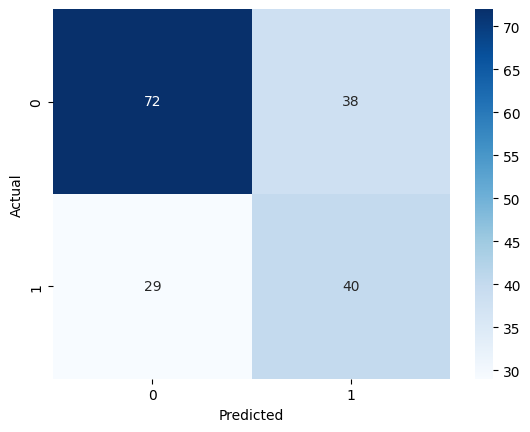

In [53]:
# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', random_state=123)
nn_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_nn = nn_model.predict(X_test)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Case 2 Results -- Age Only

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



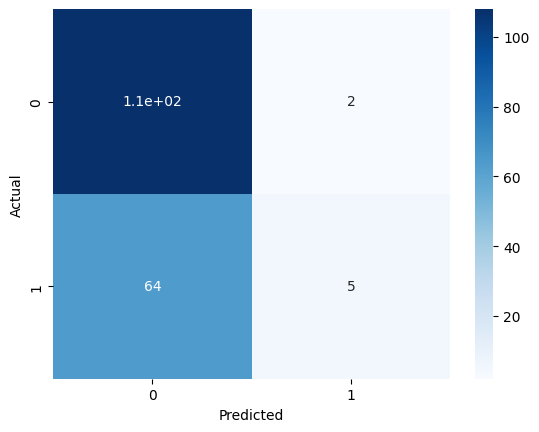

In [56]:
# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', random_state=123)
nn_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_nn = nn_model.predict(X_test)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Case 3 Results -- Age + Family

c:\Projects\applied-ml-eric\.emvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       110
           1       0.56      0.51      0.53        69

    accuracy                           0.65       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.65      0.65      0.65       179



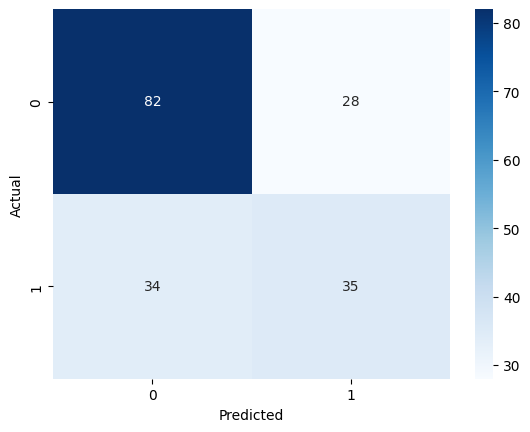

In [59]:
# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', random_state=123)
nn_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_nn = nn_model.predict(X_test)
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5:

- How did each model perform?
<br> **In terms of accuracy, the SVC RBF ranged from 61-63% from case to case, while the NN MLP ranged from 63-65% from case to case. Both were very similar.**

- Are there any suprising results?
<br> **The SVC RBF performed more accurate with just the alone input while the NN MLP was more accurate with the two inputs of age and family size which makes more sense. The NN also seemed to perform better with it's recall percentages being consistently higher than that of the SVC RBF.**

- Why might one model out perform another?
<br> **SVC with an RBF kernel is more suited to non-linear decision boundaries, while Neural Networks tend to perform well with complex patterns. This leads me to think that is why the NN could handle the complexities more efficiently.**

## Section 6: Final Thoughts and Insights

### 6.1 Summarize Findings

- **Strong Predictors of Gender:**

    Key indicators influencing gender classification include age, family size, and alone.

- **Model Performance Comparison:**
  - **Decision Tree:** Performed well but showed signs of overfitting, as it achieved high accuracy on the training set but had slightly reduced generalizability on the test data.
  - **Neural Network:** Three different configurations were tested, each producing varying levels of accuracy and balance between precision and recall.
    - **Case 1:** Achieved a balanced performance with 63% accuracy but had lower precision for Class 1.
    - **Case 2:** Showed extreme bias toward Class 0, with nearly perfect recall for Class 0 but failed to identify Class 1 effectively.
    - **Case 3:** Provided the best overall balance, with 65% accuracy and improved precision-recall tradeoffs for both classes.
  
- **Best Model:** Case 3 of the Neural Network demonstrated the most stable performance, avoiding extreme biases while slightly outperforming the Decision Tree in generalization.

### 6.2 Discuss Challenges Faces

- **Small Sample Size:** The limited number of data points (179 in the test set) may restrict the model’s ability to generalize well to unseen data.

- **Class Imbalance:** The difference in support for Class 0 and Class 1 may have led to biased predictions, particularly in NN Case 2, where the model favored Class 0 almost exclusively.

### 6.3 Next Steps

- **Feature Engineering:** Test additional predictors, such as age groups, or other demographic factors, to enhance model performance.
  
- **Hyperparameter Tuning:** Adjust learning rates, activation functions, dropout rates, or hidden layers in the Neural Network to improve results.